In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [2]:
df=pd.read_csv('Nifty.csv')

In [3]:
df.head()

,Date,Close,Open,High,Low,Vol.,Change %
0,03-01-2005,"2,115.00","2,080.00","2,118.60","2,080.00",70.51M,1.66%
1,04-01-2005,"2,103.75","2,116.95","2,120.15","2,100.55",72.72M,-0.53%
2,05-01-2005,"2,032.20","2,103.75","2,105.10","1,990.15",109.22M,-3.40%
3,06-01-2005,"1,998.35","2,031.55","2,035.65","1,984.25",94.32M,-1.67%
4,07-01-2005,"2,015.50","1,998.25","2,021.45","1,992.55",76.29M,0.86%


In [4]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y',errors='coerce')
df=df.sort_values(by="Date")
df=df.reset_index(drop=True)

In [5]:
for col in ["Close","Open","High","Low","Vol.","Change %"]:
  df[col]=df[col].astype(str).str.replace(",","").str.replace("%","")
  df[col]=pd.to_numeric(df[col],errors='coerce')

In [6]:
import plotly.express as px

In [7]:
fig=px.line(df,x="Date",y="Close",title="Nifty 50 Stock Price over periods")
fig.show()

In [8]:
df.describe()

,Date,Close,Open,High,Low,Vol.,Change %
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,0.0,5000.000000
mean,2015-01-27 16:46:33.600000,9262.215890,9267.639630,9319.288020,9202.421100,NaN,0.056576
min,2005-01-03 00:00:00,1902.500000,1903.100000,1925.600000,1894.400000,NaN,-12.980000
25%,2010-01-18 18:00:00,5066.462500,5065.025000,5117.637500,5010.962500,NaN,-0.530000
50%,2015-01-27 12:00:00,7816.750000,7828.300000,7873.775000,7766.125000,NaN,0.080000
75%,2020-02-14 18:00:00,11588.350000,11606.712500,11655.550000,11539.850000,NaN,0.700000
max,2025-02-25 00:00:00,26216.050000,26248.250000,26277.350000,26151.400000,NaN,17.740000
std,NaN,5802.720238,5807.499967,5824.004057,5780.897766,NaN,1.331198


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5000 non-null   datetime64[ns]
 1   Close     5000 non-null   float64       
 2   Open      5000 non-null   float64       
 3   High      5000 non-null   float64       
 4   Low       5000 non-null   float64       
 5   Vol.      0 non-null      float64       
 6   Change %  5000 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 273.6 KB


In [10]:
fig = px.line(df,
              x="Date",
              y=["High", "Close"],
              labels={"value": "Price", "Date": "Date"},
              title="High-Close Price over Time")

fig.update_traces(line=dict(width=2))  # optional: make lines bolder
fig.show()

In [11]:
fig = px.density_contour(
    df, x="Close",
    title="KDE of Closing Prices"
)

fig.update_traces(contours_coloring="fill", line_smoothing=1.3)
fig.update_layout(width=600, height=400)
fig.show()

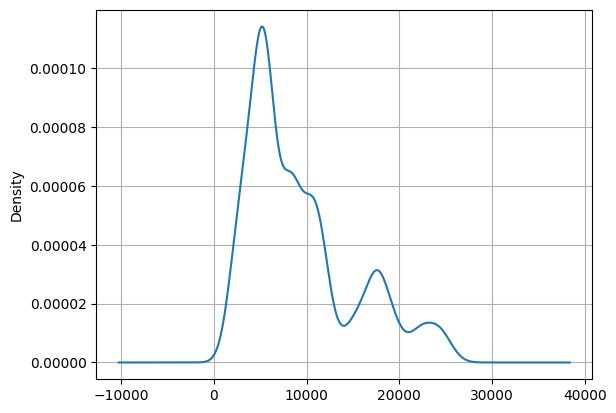

<Figure size 600x400 with 0 Axes>

In [12]:
df_close = df['Close']
df_close.plot(kind='kde')
plt.grid(True)
plt.figure(figsize=(6,4))
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

Test Statistics                   0.699127
p-value                           0.989820
No. of lags used                 30.000000
Number of observations used    4969.000000
critical value (1%)              -3.431667
critical value (5%)              -2.862122
critical value (10%)             -2.567080
dtype: float64


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_close, model='additive', period=30)

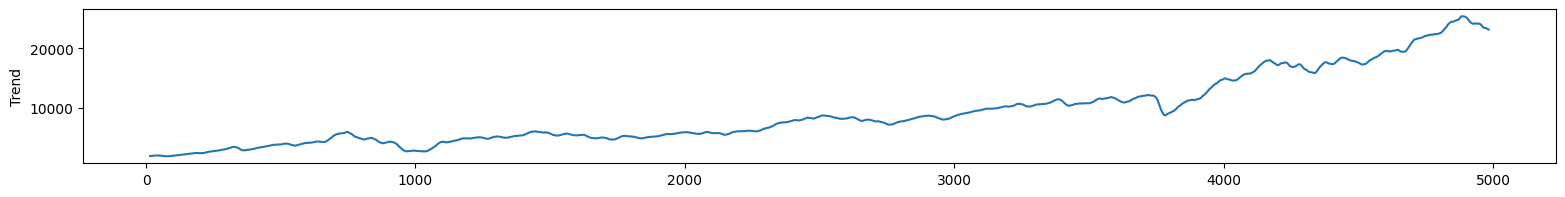

In [15]:
plt.figure(figsize=(19,2))
plt.ylabel('Trend')
plt.plot(result.trend)

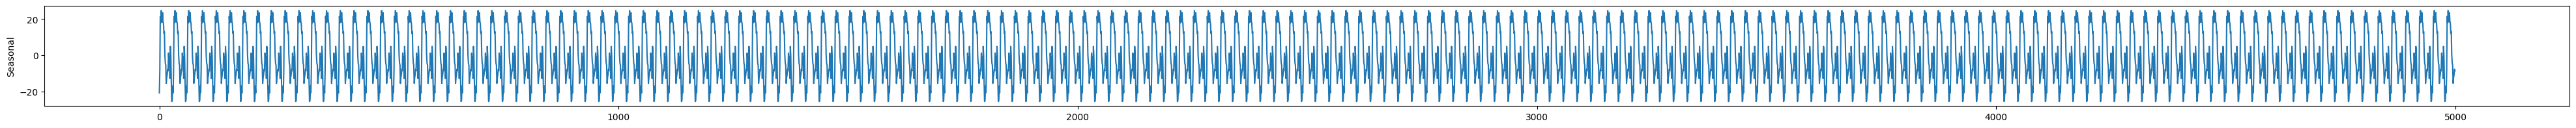

In [16]:
plt.figure(figsize=(50,2))
plt.ylabel('Seasonal')
plt.plot(result.seasonal)

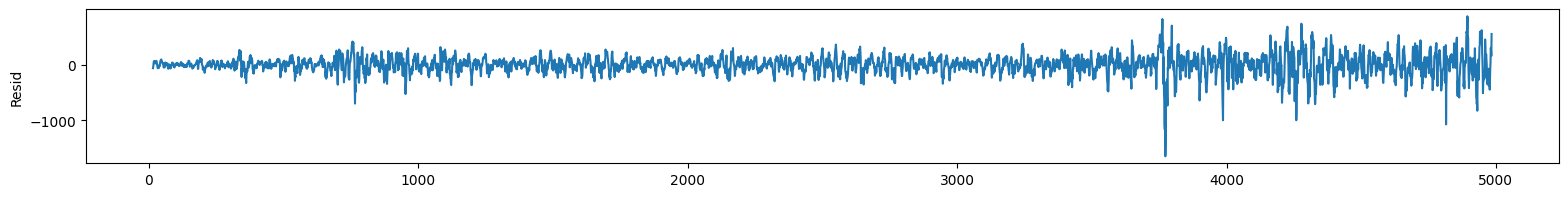

In [17]:
plt.figure(figsize=(19,2))
plt.ylabel('Resid')
plt.plot(result.resid)

In [50]:
from statsmodels.tsa.arima.model import ARIMA


It appears there is a compatibility issue between some libraries after installing `pmdarima`. Please try restarting the Colab runtime (`Runtime > Restart runtime`) and then re-run all the cells from the beginning. This often resolves such issues.

In [48]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.9 MB/s eta 0:00:00


In [21]:
numeric_data = df.select_dtypes(include=["int64","float64"])

Text(0.5, 1.0, 'Feature Correlation Heatmap')

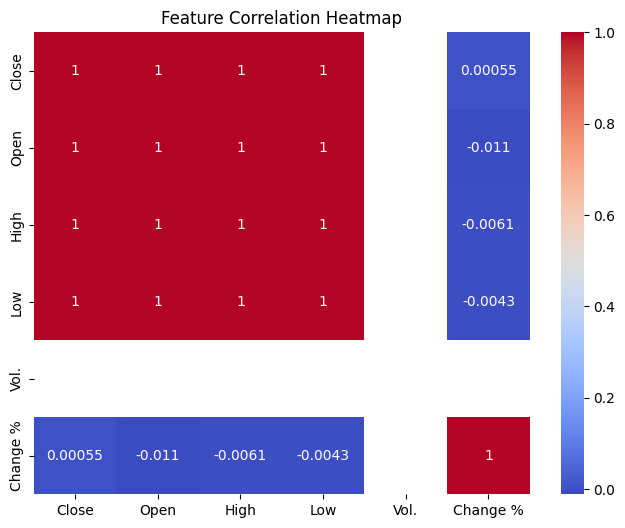

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")

In [24]:
stock_close = df.filter(["Close"])
dataset = stock_close.values
training_data_len = int(np.ceil(len(dataset) * 0.95))

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [26]:
training_data = scaled_data[:training_data_len]

In [27]:
X_train, y_train = [], []

In [28]:
# Create a sliding window for our stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])

In [29]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
model = keras.models.Sequential()

# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))

# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))

# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))

# Final Output Layer
model.add(keras.layers.Dense(1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [32]:
model.summary()
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
training = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2288 - root_mean_squared_error: 0.3420
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1000 - root_mean_squared_error: 0.1451
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0924 - root_mean_squared_error: 0.1336
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0861 - root_mean_squared_error: 0.1248
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0858 - root_mean_squared_error: 0.1249
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0833 - root_mean_squared_error: 0.1229
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0797 - root_mean_squared_error: 0.1163
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0825 - root_mean_squared_error: 0.1219
Epoch 9/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0833 - root_mean_squared_error: 0.1249
Epoch 10/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0794 - root_mean_squared_e

In [34]:
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]

In [35]:
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

In [36]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))


In [37]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


In [38]:
train = df[:training_data_len]
test =  df[training_data_len:]

In [39]:
test = test.copy()

In [40]:
test['Predictions'] = predictions

In [41]:
import plotly.graph_objects as go

fig = go.Figure()

# Training data
fig.add_trace(go.Scatter(
    x=train['Date'], y=train['Close'],
    mode='lines',
    name="Train (Actual)",
    line=dict(color='blue')
))

# Test data
fig.add_trace(go.Scatter(
    x=test['Date'], y=test['Close'],
    mode='lines',
    name="Test (Actual)",
    line=dict(color='orange')
))

# Predictions
fig.add_trace(go.Scatter(
    x=test['Date'], y=test['Predictions'],
    mode='lines',
    name="Predictions",
    line=dict(color='red')
))

# Layout
fig.update_layout(
    title="Our Stock Predictions",
    xaxis_title="Date",
    yaxis_title="Close Price",
    legend=dict(x=0, y=1, traceorder="normal"),
    width=1500,
    height=600
)

fig.show()


In [47]:
test[['Close','Predictions']]

,Close,Predictions
4750,22198.35,20756.554688
4751,21951.15,20763.859375
4752,21982.80,20673.892578
4753,22338.75,20621.882812
4754,22378.40,20739.156250
...,...,...
4995,22932.90,21389.408203
4996,22913.15,21386.828125
4997,22795.90,21380.035156
4998,22553.35,21330.992188


In [66]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual values
fig.add_trace(go.Scatter(
    x=test['Date'], y=test['Close'],
    mode='lines',
    name="Actual",
    line=dict(color='blue')
))

# Predicted values
fig.add_trace(go.Scatter(
    x=test['Date'], y=test['Predictions'],
    mode='lines',
    name="Predicted",
    line=dict(color='red')
))

# Layout
fig.update_layout(
    title="Actual vs Predicted",
    xaxis_title="Date",
    yaxis_title="Close Price",
    legend=dict(x=0, y=1),
    width=900, height=600
)

fig.show()



In [69]:
look_back = 60
last_sequence = test[-look_back:]['Close'].values
last_sequence = last_sequence.reshape(1, look_back, 1)

future_predictions = []

for _ in range(30):  # forecast 30 future days
    pred = model.predict(last_sequence)
    future_predictions.append(pred[0,0])


    last_sequence = np.append(last_sequence[:,1:,:], pred.reshape(1,1,1), axis=1)

# inverse transform to get actual prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [73]:
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=31, freq='D')[1:] # Start from the day after the last date
future_df = pd.DataFrame({'Date': future_dates, 'Predictions': future_predictions.flatten()})
combined_df = pd.concat([df, future_df], ignore_index=True)

In [74]:
future_df

,Date,Predictions
0,2025-02-26,32270.789062
1,2025-02-27,33701.527344
2,2025-02-28,33074.371094
3,2025-03-01,32288.171875
4,2025-03-02,31467.937500
5,2025-03-03,30724.765625
6,2025-03-04,30091.265625
7,2025-03-05,29552.257812
8,2025-03-06,29021.742188
9,2025-03-07,28390.619141


In [76]:
import plotly.graph_objects as go

fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=df['Date'], y=df['Close'],
    mode='lines',
    name="Historical",
    line=dict(color="blue")
))

# Future predictions
fig.add_trace(go.Scatter(
    x=future_df['Date'], y=future_df['Predictions'],
    mode='lines',
    name="Future Predictions",
    line=dict(color="red", dash="dash")
))

fig.update_layout(
    title="Stock Price Forecast",
    xaxis_title="Date",
    yaxis_title="Close Price",
    legend=dict(x=0, y=1),
    width=1200, height=600
)

fig.show()
